# Imports

In [1]:
# Basics
import numpy as np
import pandas as pd
import os
import scipy import stats
from scipy import math
import requests
import datetime
from datetime import datetime

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Custom
import wrangle
import prepare

# plotting defaults
plt.rc('figure', figsize=(11, 5))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# Exercises
   - Split data (train/validate/test) and resample by any period except daily. Aggregate using the sum.
   - Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:
      -  Simple Average
      -  Moving Average
      -  Holt's Linear Trend Model
      -  Based on previous year/month/etc., this is up to you.


In [4]:
df = wrangle.store_item_sales()
df = prepare.prep_store_data(df)
df.head(3)

Reading merged data from csv file...


,quantity,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,sales_total,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,10.92,January,Tuesday
2013-01-01,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,218.40,January,Tuesday
2013-01-01,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,125.55,January,Tuesday


In [5]:
df.shape

(913000, 15)

In [6]:
# Resample data to a day-to-day representation by agg same days together
df = df.resample('d')[['sales_total', 'quantity']].sum()

# remove leap day for the sake of congruent seasonal analysis
df= df[df.index != '2016-02-29']

In [7]:
df.shape

(1825, 2)

In [8]:
df.head()

,sales_total,quantity
sale_date,,
2013-01-01,73844.01,13696.0
2013-01-02,73570.58,13678.0
2013-01-03,78169.48,14488.0
2013-01-04,84467.73,15677.0
2013-01-05,87621.85,16237.0


In [10]:
# Since I know there is repeated seasonality, I can split the data by year

train = df.loc[:'2015']
validate = df.loc['2016']
test = df.loc['2017']

train.shape, validate.shape, test.shape

((1095, 2), (365, 2), (365, 2))

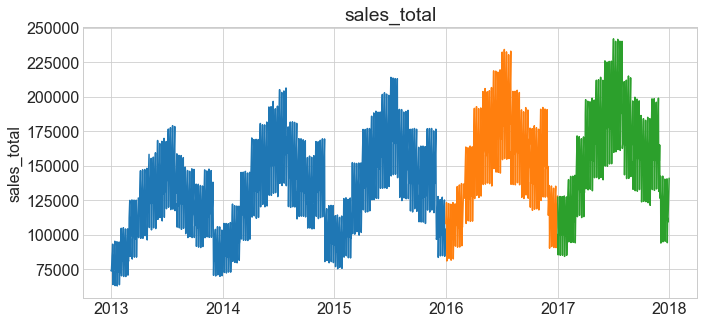

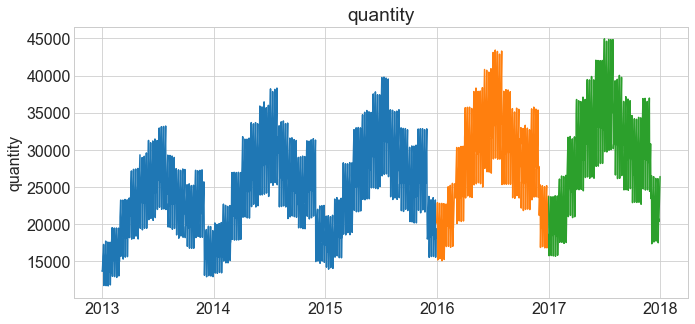

In [12]:
# plot to visualize train, validate, test split

for col in train.columns:
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()